In [54]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

In [55]:
df=pd.read_csv(r"C:\Users\rohit\Downloads\data.csv")

In [56]:
df.head()


,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,01-01-2018,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,01-01-2018,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,01-01-2018,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,01-01-2018,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,01-01-2018,1,Yes,62,45614.52


In [57]:
df.info()
df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


(188340, 10)

In [30]:
df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [31]:
df.Date = pd.to_datetime(df.Date)

C:\Users\rohit\AppData\Local\Temp\ipykernel_18492\4238552302.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Date = pd.to_datetime(df.Date)


In [32]:
def date(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['dayofweek'] = df['Date'].dt.dayofweek

date(df)

In [33]:
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day,dayofweek
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1,0
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1,0
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1,0
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1,0
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,2019,5,31,4
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,2019,5,31,4
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,2019,5,31,4
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,2019,5,31,4


In [34]:
df.drop(['ID','Date'],axis=1)

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,Year,Month,Day,dayofweek
0,1,S1,L3,R1,1,Yes,9,7011.84,2018,1,1,0
1,253,S4,L2,R1,1,Yes,60,51789.12,2018,1,1,0
2,252,S3,L2,R1,1,Yes,42,36868.20,2018,1,1,0
3,251,S2,L3,R1,1,Yes,23,19715.16,2018,1,1,0
4,250,S2,L3,R4,1,Yes,62,45614.52,2018,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
188335,149,S2,L3,R2,1,Yes,51,37272.00,2019,5,31,4
188336,153,S4,L2,R1,1,No,90,54572.64,2019,5,31,4
188337,154,S1,L3,R2,1,No,56,31624.56,2019,5,31,4
188338,155,S3,L1,R2,1,Yes,70,49162.41,2019,5,31,4


In [35]:
from sklearn.preprocessing import LabelEncoder
cat_cols = [cname for cname in df.columns if
           df[cname].dtype == 'object']
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
    


In [36]:
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day,dayofweek
0,0,1,0,2,0,2018-01-01,1,1,9,7011.84,2018,1,1,0
1,1,253,3,1,0,2018-01-01,1,1,60,51789.12,2018,1,1,0
2,2,252,2,1,0,2018-01-01,1,1,42,36868.20,2018,1,1,0
3,3,251,1,2,0,2018-01-01,1,1,23,19715.16,2018,1,1,0
4,4,250,1,2,3,2018-01-01,1,1,62,45614.52,2018,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,188335,149,1,2,1,2019-05-31,1,1,51,37272.00,2019,5,31,4
188336,188336,153,3,1,0,2019-05-31,1,0,90,54572.64,2019,5,31,4
188337,188337,154,0,2,1,2019-05-31,1,0,56,31624.56,2019,5,31,4
188338,188338,155,2,0,1,2019-05-31,1,1,70,49162.41,2019,5,31,4


C:\Users\rohit\AppData\Local\Temp\ipykernel_18492\1580014865.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cor=df.corr()


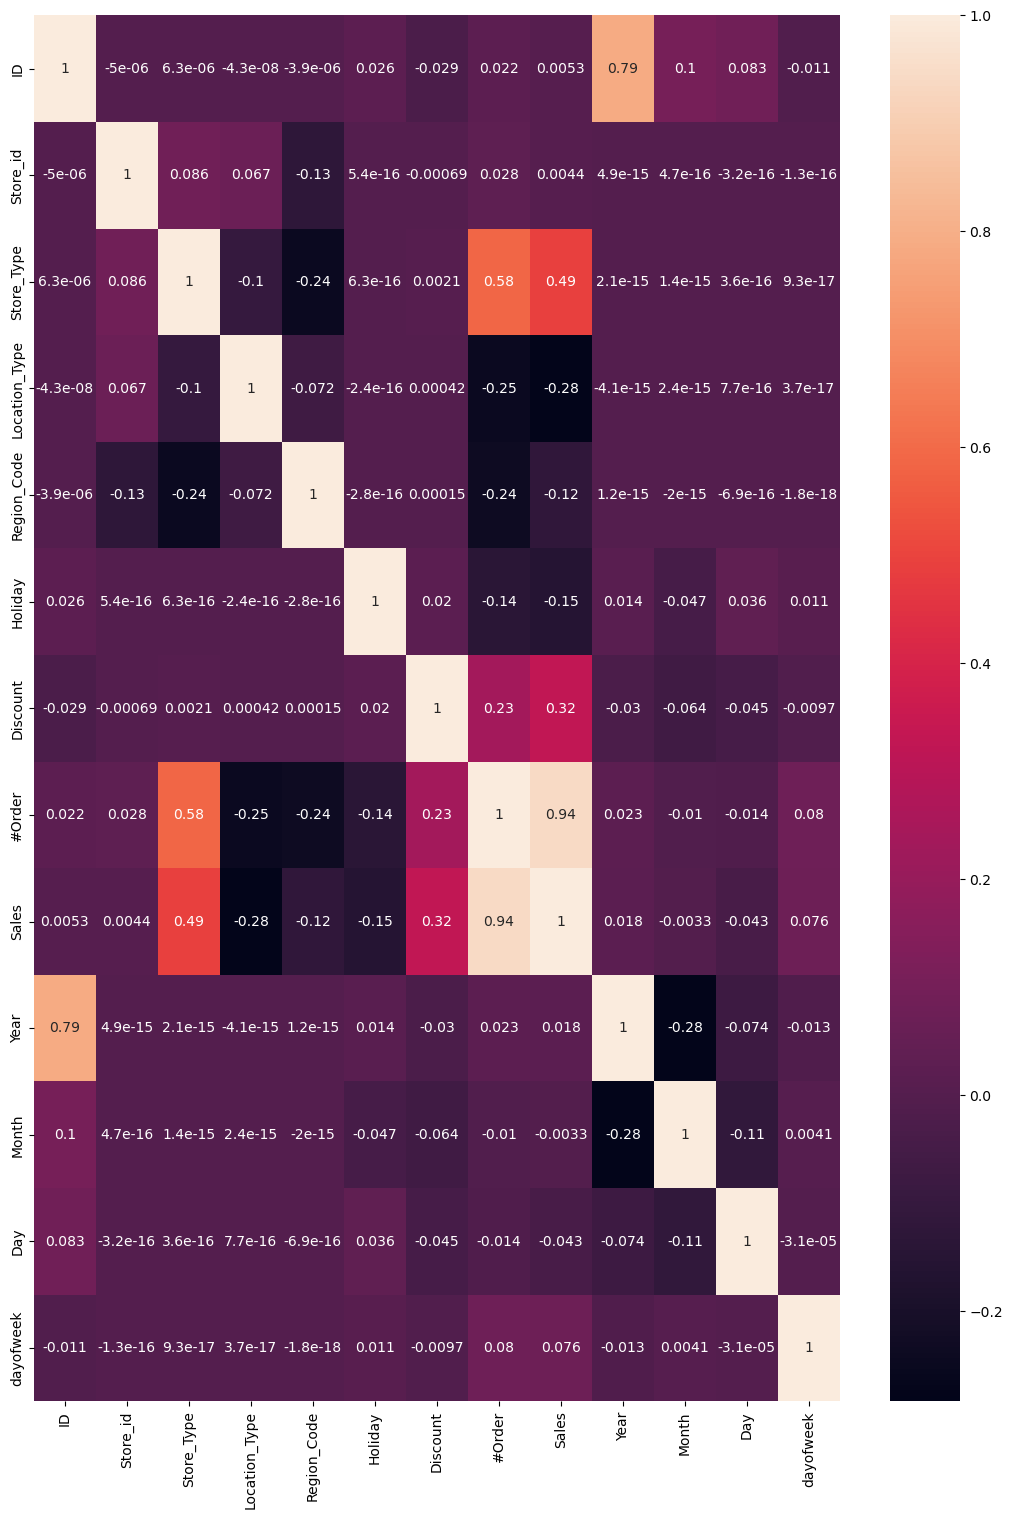

In [37]:
df_cor=df.corr()
plt.figure(figsize=(13,18))

ax=sns.heatmap(df_cor,annot=True)
plt.show()

In [38]:
x=df[['Discount','#Order','Store_Type']]
x
y=df['Sales']
y

0          7011.84
1         51789.12
2         36868.20
3         19715.16
4         45614.52
            ...   
188335    37272.00
188336    54572.64
188337    31624.56
188338    49162.41
188339    37977.00
Name: Sales, Length: 188340, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=78)

In [40]:
x_train

,Discount,#Order,Store_Type
124745,1,108,0
165,1,79,0
89605,1,53,0
138782,1,97,2
39147,0,86,3
...,...,...,...
112756,0,81,3
168477,1,149,3
104758,1,70,0
16854,0,42,0


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [42]:
x_train_scaled=scaler.transform(x_train)

In [43]:
x_train_scaled

array([[1.        , 0.29110512, 0.        ],
       [1.        , 0.21293801, 0.        ],
       [1.        , 0.14285714, 0.        ],
       ...,
       [1.        , 0.18867925, 0.        ],
       [0.        , 0.11320755, 0.        ],
       [0.        , 0.14016173, 0.        ]])

In [44]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred=model.predict(x_test)

In [46]:
model.score(x_test,y_test)

0.9014091453415496

In [47]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 33780214.772505164
R-squared: 0.9014091453415496


In [63]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2=r2_score(y_test,y_pred)
r2

0.9068739853075801

In [48]:

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

predictions = rf_model.predict(x_test)


mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
r2=r2_score(y_test,predictions)
r2

Mean Squared Error: 31852217.91040034


0.9070361924072313

In [26]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [64]:

import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

xgb_model.fit(x_train, y_train)


predictions = xgb_model.predict(x_test)


mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
r2=r2_score(y_test,predictions)
r2

Mean Squared Error: 31583347.548090655


0.9078209168085106

accuracy of xgboost is greater than other model

In [71]:
#Time series

In [30]:
df1=df[['Sales','Date']]
df1

,Sales,Date
0,7011.84,2018-01-01
1,51789.12,2018-01-01
2,36868.20,2018-01-01
3,19715.16,2018-01-01
4,45614.52,2018-01-01
...,...,...
188335,37272.00,2019-05-31
188336,54572.64,2019-05-31
188337,31624.56,2019-05-31
188338,49162.41,2019-05-31


In [ ]:
#checking data is stationary

In [32]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df1['Sales'])

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary ")
        


In [35]:
adfuller_test(df1['Sales'])

ADF Test Statistic : -12.89492595743672
p-value : 4.369094951042355e-24
#Lags Used : 80
Number of Observations : 188259
Data is stationary


In [33]:
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


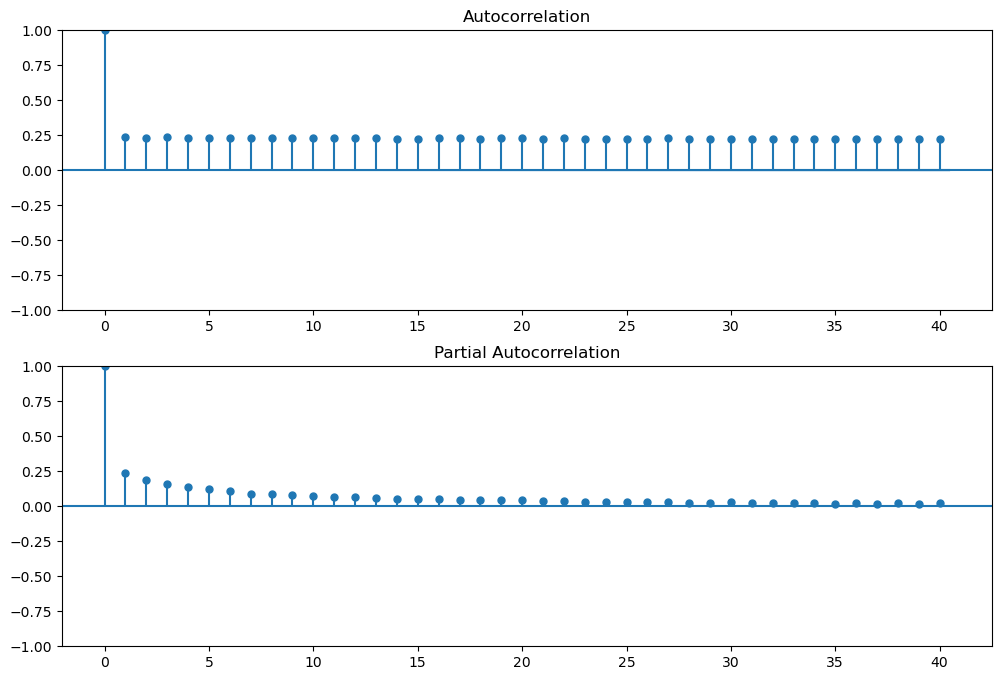

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['Sales'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['Sales'].iloc[13:],lags=40,ax=ax2)

In [6]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
df.Date = pd.to_datetime(df.Date)

In [15]:
data=df.set_index('Date').sort_index()

In [16]:
train_size=int(len(data)*0.7)
train_data,test_data=data[:train_size],data[train_size:]

In [17]:
p,d,q=1,1,1
model=ARIMA(train_data['Sales'],order=(p,d,q))
model_fit=model.fit()

C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [58]:
pred=model_fit.forecast(steps=len(test_data))

C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [69]:
pred

131838    48928.894664
131839    48857.093921
131840    48857.288720
131841    48857.288192
131842    48857.288193
              ...     
188335    48857.288193
188336    48857.288193
188337    48857.288193
188338    48857.288193
188339    48857.288193
Name: predicted_mean, Length: 56502, dtype: float64

In [21]:
from sklearn.metrics import mean_squared_error

In [25]:
mse=mean_squared_error(test_data['Sales'],pred)
mse

411098362.36166584